In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [2]:
teams = pd.read_csv('D1_teams.csv')
teams.drop(columns=['code_ncaa','school_ncaa','turner_name','league_name','league_alias','conf_alias',
                    'conf_id','division_name','division_alias','division_id','venue_id'], inplace=True)
teams.info()
teams.set_index('id',inplace=True)
teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 3 columns):
id                351 non-null object
kaggle_team_id    351 non-null int64
conf_name         351 non-null object
dtypes: int64(1), object(2)
memory usage: 8.3+ KB


,kaggle_team_id,conf_name
id,,
fe406882-9f22-495e-9df6-ef357a6803c6,1343,Ivy
ca478771-aa3d-4231-81e0-b70f519134fb,1463,Ivy
5c7bf63f-bc39-43c5-9907-73b50b7a6b34,1217,Ivy
d60357bd-1205-42e9-9092-d986a2843a34,1171,Ivy
88ff8c00-958e-4ccf-a21d-77fab9e93692,1165,Ivy


In [3]:
summary_2015_data = pd.read_csv('Season_2015_summary.csv')
summary_2015_data.info()
#summary_2015_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 18 columns):
market                351 non-null object
team_id               351 non-null object
points_avg            351 non-null float64
opp_pts_avg           351 non-null float64
possesion_avg         351 non-null float64
fg_pct                351 non-null float64
allow_fg_pct          351 non-null float64
off_rebs_avg          351 non-null float64
allow_off_rebs_avg    351 non-null float64
def_rebs_avg          351 non-null float64
allow_def_rebs_avg    351 non-null float64
ft_att_avg            351 non-null float64
allow_ft_att_avg      351 non-null float64
ft_pct                351 non-null float64
turnover_avg          351 non-null float64
take_away_avg         351 non-null float64
win_pct               351 non-null float64
off_rating            351 non-null float64
dtypes: float64(16), object(2)
memory usage: 49.4+ KB


In [4]:
game_data = pd.read_csv('tournament_results.csv')
game_data.drop(columns=['days_from_epoch'],inplace=True)
game_data.info()
#game_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 26 columns):
season                 2117 non-null int64
round                  2117 non-null int64
game_date              2117 non-null object
day                    2117 non-null object
win_seed               2117 non-null int64
win_region             2117 non-null object
win_market             2117 non-null object
win_name               2117 non-null object
win_alias              2117 non-null object
win_team_id            2117 non-null object
win_school_ncaa        2117 non-null object
win_code_ncaa          2117 non-null int64
win_kaggle_team_id     2117 non-null int64
win_pts                2117 non-null int64
lose_seed              2117 non-null int64
lose_region            2117 non-null object
lose_market            2117 non-null object
lose_name              2117 non-null object
lose_alias             2117 non-null object
lose_team_id           2117 non-null object
lose_school_ncaa    

Join add the corresponding conference names for the game participants.

In [5]:
number_years = game_data.season.value_counts().shape[0]
print("Number of years = ", number_years)

Number of years =  33


How many tournament games per year?

In [6]:
game_data['season'] = game_data['season'].astype('category')

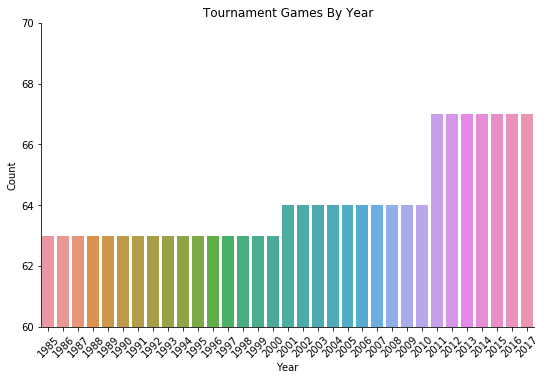

In [7]:
g = sns.catplot('season',kind='count',aspect=1.5,  data=game_data)
g.set_xticklabels(rotation=45).ax.set(ylim=(60, 70))
g.ax.set_title("Tournament Games By Year")
g.ax.set(xlabel='Year', ylabel='Count')
plt.show()

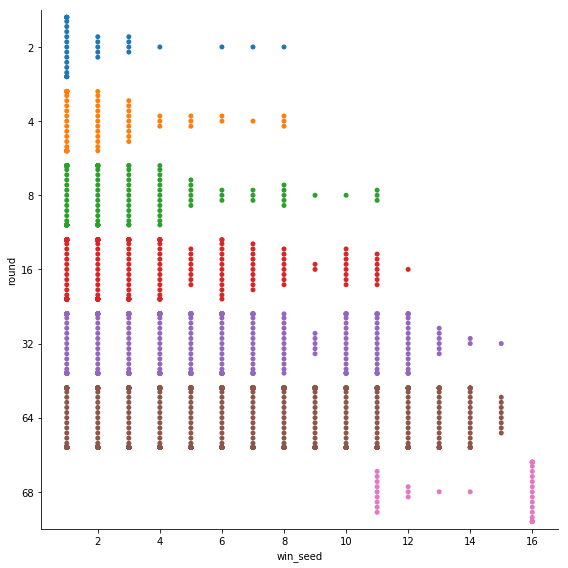

In [8]:
game_data['round'] = game_data['round'].astype('category')
sns.catplot(x='win_seed', y='round',kind='swarm',height=8, aspect=1, data=game_data)

What percentage of tournament seeds have won the tournament since 1985?

In [9]:
number_seeds = number_years * 4 
result =game_data[game_data['round']==2].groupby(['win_seed']).size()
total = result.sum()
result =result.reset_index(name='count')
result['percent'] =100* result['count']/total
result

,win_seed,count,percent
0,1,20,60.606061
1,2,5,15.151515
2,3,4,12.121212
3,4,1,3.030303
4,6,1,3.030303
5,7,1,3.030303
6,8,1,3.030303


60% of tournament winners, since 1985, have been number 1 seeds.

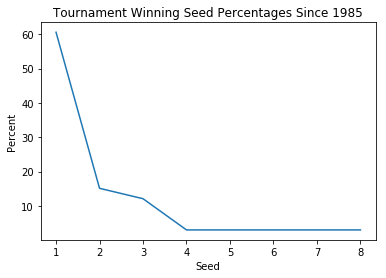

In [10]:
ax= sns.lineplot(x="win_seed", y="percent",data=result)
ax.set(xlabel='Seed', ylabel= 'Percent')
ax.set_title("Tournament Winning Seed Percentages Since 1985")
plt.show()

In [11]:
game_data = game_data.join(teams,on='win_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'win_kaggle_team_id','conf_name':'win_conf_name'}, inplace=True)
game_data = game_data.join(teams,on='lose_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'lose_kaggle_team_id','conf_name':'lose_conf_name'}, inplace=True)

#game_data.info()

In [12]:
winners = game_data[game_data['round']==2][['season','win_market','win_conf_name']]
winners.sort_values(by=['season'])

,season,win_market,win_conf_name
1321,1985,Villanova,Big East
1415,1986,Louisville,Atlantic Coast
955,1987,Indiana,Big Ten
979,1988,Kansas,Big 12
1782,1989,Michigan,Big Ten
393,1990,UNLV,Mountain West
1875,1991,Duke,Atlantic Coast
1825,1992,Duke,Atlantic Coast
1554,1993,North Carolina,Atlantic Coast
1723,1994,Arkansas,Southeastern


In [13]:
winners.groupby(['win_market']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,win_market,count
3,Duke,5
2,Connecticut,4
12,North Carolina,4
7,Kentucky,3
8,Louisville,2
6,Kansas,2
16,Villanova,2
4,Florida,2
5,Indiana,1
1,Arkansas,1


In [14]:
win_conf =winners.groupby('win_conf_name').size().reset_index(name='count').sort_values(by=['count'], ascending=False)
#win_conf

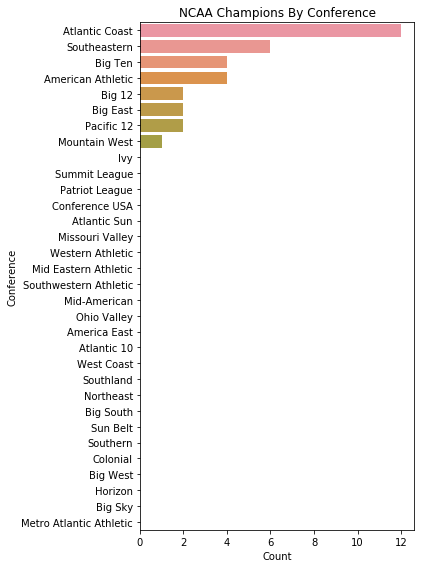

In [15]:
conferences = teams.conf_name.unique()
index = ['Row'+str(i) for i in range(1, len(conferences)+1)]
conf_df = pd.DataFrame(conferences, index=index)
conf_df.columns = ['conf_name']

conf_wins = conf_df.merge(win_conf, left_on='conf_name', right_on='win_conf_name', how='left')
conf_wins.drop(columns=['win_conf_name'], inplace=True)
conf_wins['count'].fillna(0, inplace=True)

conf_wins = conf_wins.sort_values(by=['count'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(6,8))
ax = sns.barplot(x="count", y="conf_name",  data=conf_wins)
ax.set(xlabel="Count", ylabel='Conference')
ax.set_title("NCAA Champions By Conference")
plt.tight_layout()
plt.show()

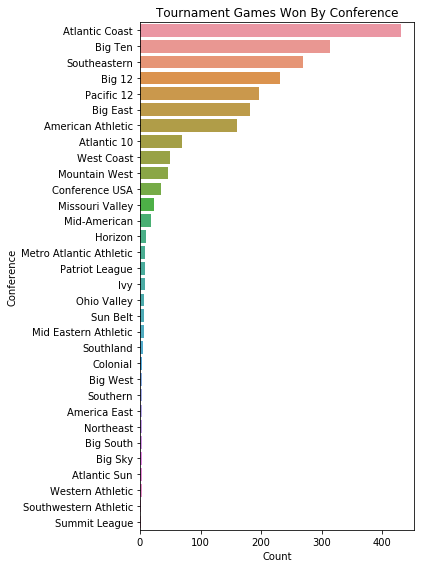

In [17]:
#All tournament wins by conference
games_won_conf = game_data.groupby('win_conf_name').size().reset_index(name='count').sort_values(by=['count'], ascending=False)
plt.figure(figsize=(6,8))
ax = sns.barplot(x="count", y="win_conf_name",  data=games_won_conf)
ax.set(xlabel="Count", ylabel='Conference')
ax.set_title("Tournament Games Won By Conference")
plt.tight_layout()
plt.show()

In [22]:

games_won_conf['percent'] = 100* games_won_conf['count']/games_won_conf['count'].sum()
games_won_conf

,win_conf_name,count,percent
3,Atlantic Coast,431,20.358999
9,Big Ten,313,14.785073
24,Southeastern,269,12.706660
5,Big 12,231,10.911667
22,Pacific 12,197,9.305621
6,Big East,182,8.597071
1,American Athletic,161,7.605102
2,Atlantic 10,70,3.306566
30,West Coast,50,2.361833
19,Mountain West,47,2.220123


In [427]:
# What were the elite eight teams in 2016
elite =game_data[(game_data['round']==16) & (game_data['season']==2016)][['win_market','win_team_id','win_seed']]
elite.set_index('win_team_id',inplace=True)
elite

,win_market,win_seed
win_team_id,,
1da70895-f77f-44ef-b216-d63c02e696eb,Oregon,1
8cd24de1-2be8-4b77-bcfa-47be0495a5f4,Syracuse,10
b2fda957-e15c-4fb2-8a13-6e58496f561e,Oklahoma,2
fae4855b-1b64-4b40-a632-9ed345e1e952,Kansas,1
4383eb6a-7fd8-4ff2-94c5-43c933121e88,Villanova,2
56913910-87f7-4ad7-ae3b-5cd9fb218fd9,Virginia,1
e9ca48b2-00ba-41c0-a02b-6885a2da1ff1,North Carolina,1
80962f09-8821-48b6-8cf0-0cf0eea56aa8,Notre Dame,6


In [428]:
result_df = summary_2015_data.join(elite,on='team_id',how='inner')
result_df.sort_values(by=['off_rating'],ascending=False)[['market','off_rating','win_seed']]

,market,off_rating,win_seed
2,Villanova,104.687080,2
8,Virginia,102.899686,1
14,Notre Dame,101.830232,6
16,Kansas,101.742590,1
33,North Carolina,99.807077,1
39,Oregon,98.963306,1
44,Oklahoma,98.575535,2
174,Syracuse,92.418076,10


In [429]:
#who won in 2016?
game_data[(game_data['round']==2) & (game_data['season']==2016)][['win_market','win_team_id','win_seed']]

,win_market,win_team_id,win_seed
1316,Villanova,4383eb6a-7fd8-4ff2-94c5-43c933121e88,2


In [430]:
result_df

,market,team_id,points_avg,opp_pts_avg,possesion_avg,fg_pct,allow_fg_pct,off_rebs_avg,allow_off_rebs_avg,def_rebs_avg,allow_def_rebs_avg,ft_att_avg,allow_ft_att_avg,ft_pct,turnover_avg,take_away_avg,win_pct,off_rating,win_market,win_seed
2,Villanova,4383eb6a-7fd8-4ff2-94c5-43c933121e88,77.950,63.575,74.460000,0.483311,0.403204,7.900,8.800,24.675,20.350,19.150,16.850,0.781984,10.625,13.450,0.875,104.687080,Villanova,2
8,Virginia,56913910-87f7-4ad7-ae3b-5cd9fb218fd9,70.973,60.054,68.972972,0.491085,0.420227,7.595,6.838,21.703,19.108,17.027,16.676,0.752381,9.108,11.216,0.784,102.899686,Virginia,1
14,Notre Dame,80962f09-8821-48b6-8cf0-0cf0eea56aa8,75.111,70.583,73.761111,0.476004,0.431755,9.250,9.833,22.861,20.667,18.639,15.528,0.742176,9.583,9.417,0.667,101.830232,Notre Dame,6
16,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,80.162,67.514,78.789189,0.489691,0.398405,9.081,9.108,26.027,20.919,22.243,21.486,0.713244,12.216,12.270,0.865,101.742590,Kansas,1
33,North Carolina,e9ca48b2-00ba-41c0-a02b-6885a2da1ff1,82.775,70.025,82.935000,0.482234,0.416597,12.775,9.200,25.325,19.200,20.650,18.125,0.746973,10.650,12.375,0.825,99.807077,North Carolina,1
39,Oregon,1da70895-f77f-44ef-b216-d63c02e696eb,78.432,69.027,79.254054,0.463695,0.427294,10.081,9.081,22.757,21.405,23.676,18.378,0.715753,10.973,13.946,0.811,98.963306,Oregon,1
44,Oklahoma,b2fda957-e15c-4fb2-8a13-6e58496f561e,79.676,71.054,80.827027,0.457528,0.411663,9.649,10.081,25.784,22.622,19.838,17.730,0.722071,12.757,12.297,0.784,98.575535,Oklahoma,2
174,Syracuse,8cd24de1-2be8-4b77-bcfa-47be0495a5f4,69.973,65.108,75.713513,0.424592,0.412124,10.378,10.973,21.946,22.243,19.892,16.081,0.687500,11.486,12.919,0.622,92.418076,Syracuse,10


Seed Deltas  

Find all games where lower seed upsets higher seed

In [437]:
print("Number of games= ", game_data.shape[0])
upsets = game_data[game_data['win_seed'] > game_data['lose_seed']][['season','win_market','lose_market','win_seed','lose_seed']]
print("Number of upsets= ", upsets.shape[0], "Percent upsets= ", 100*upsets.shape[0]/(upsets.shape[0] + game_data.shape[0]))

Number of games=  2117
Number of upsets=  577 Percent upsets=  21.41796585003712


In [438]:
upsets['delta_seed'] = abs(upsets['win_seed'] - upsets['lose_seed'])
upsets.sort_values(by=['delta_seed'],ascending=False)[['delta_seed','season','win_market','lose_market','win_seed','lose_seed']]

,delta_seed,season,win_market,lose_market,win_seed,lose_seed
657,13,2001,Hampton,Iowa State,15,2
241,13,1997,Coppin State,South Carolina,15,2
239,13,2013,Florida Gulf Coast,Georgetown,15,2
718,13,1991,Richmond,Syracuse,15,2
2054,13,2012,Lehigh,Duke,15,2
543,13,1993,Santa Clara,Arizona,15,2
1100,13,2012,Norfolk State,Missouri,15,2
1904,13,2016,Middle Tennessee,Michigan State,15,2
1896,11,2016,Stephen F. Austin,West Virginia,14,3
82,11,2014,Mercer,Duke,14,3


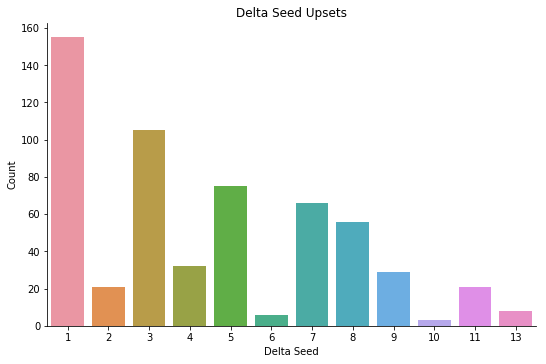

In [441]:
g = sns.catplot('delta_seed',kind='count',aspect=1.5,  data=upsets)
g.ax.set_title("Delta Seed Upsets")
g.ax.set(xlabel='Delta Seed', ylabel='Count')
plt.show()

The plot above depicts the difference in the winning seed and the losing seed when a higher seed upsets a lower seed.
For example, if a 13th seed upsets a 5th seed, the difference(delta) would be 5.

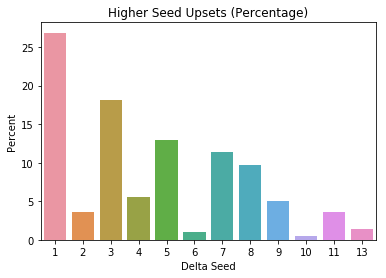

In [440]:
g2 =sns.barplot(x="delta_seed", y="delta_seed", data=upsets, orient="v",estimator=lambda x: len(x) / len(upsets) * 100)
g2.set(xlabel='Delta Seed', ylabel='Percent')
g2.set_title("Higher Seed Upsets (Percentage)")
plt.show()

Approximately 70% of upsets occur when the difference in seeding is 6 or less.